# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Import Required Libraries

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import csv
import os
import cv2
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic_sign_data/train.p'
validation_file= 'traffic_sign_data/valid.p'
testing_file = 'traffic_sign_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Length of X_train: ', len(X_train))
print('Length of X_valid: ', len(X_valid))
print('Length of X_test : ', len(X_test))
print('Length of y_train: ', len(y_train))
print('Length of y_valid: ', len(y_valid))
print('Length of y_test : ', len(y_test))

Length of X_train:  34799
Length of X_valid:  4410
Length of X_test :  12630
Length of y_train:  34799
Length of y_valid:  4410
Length of y_test :  12630


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results


# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

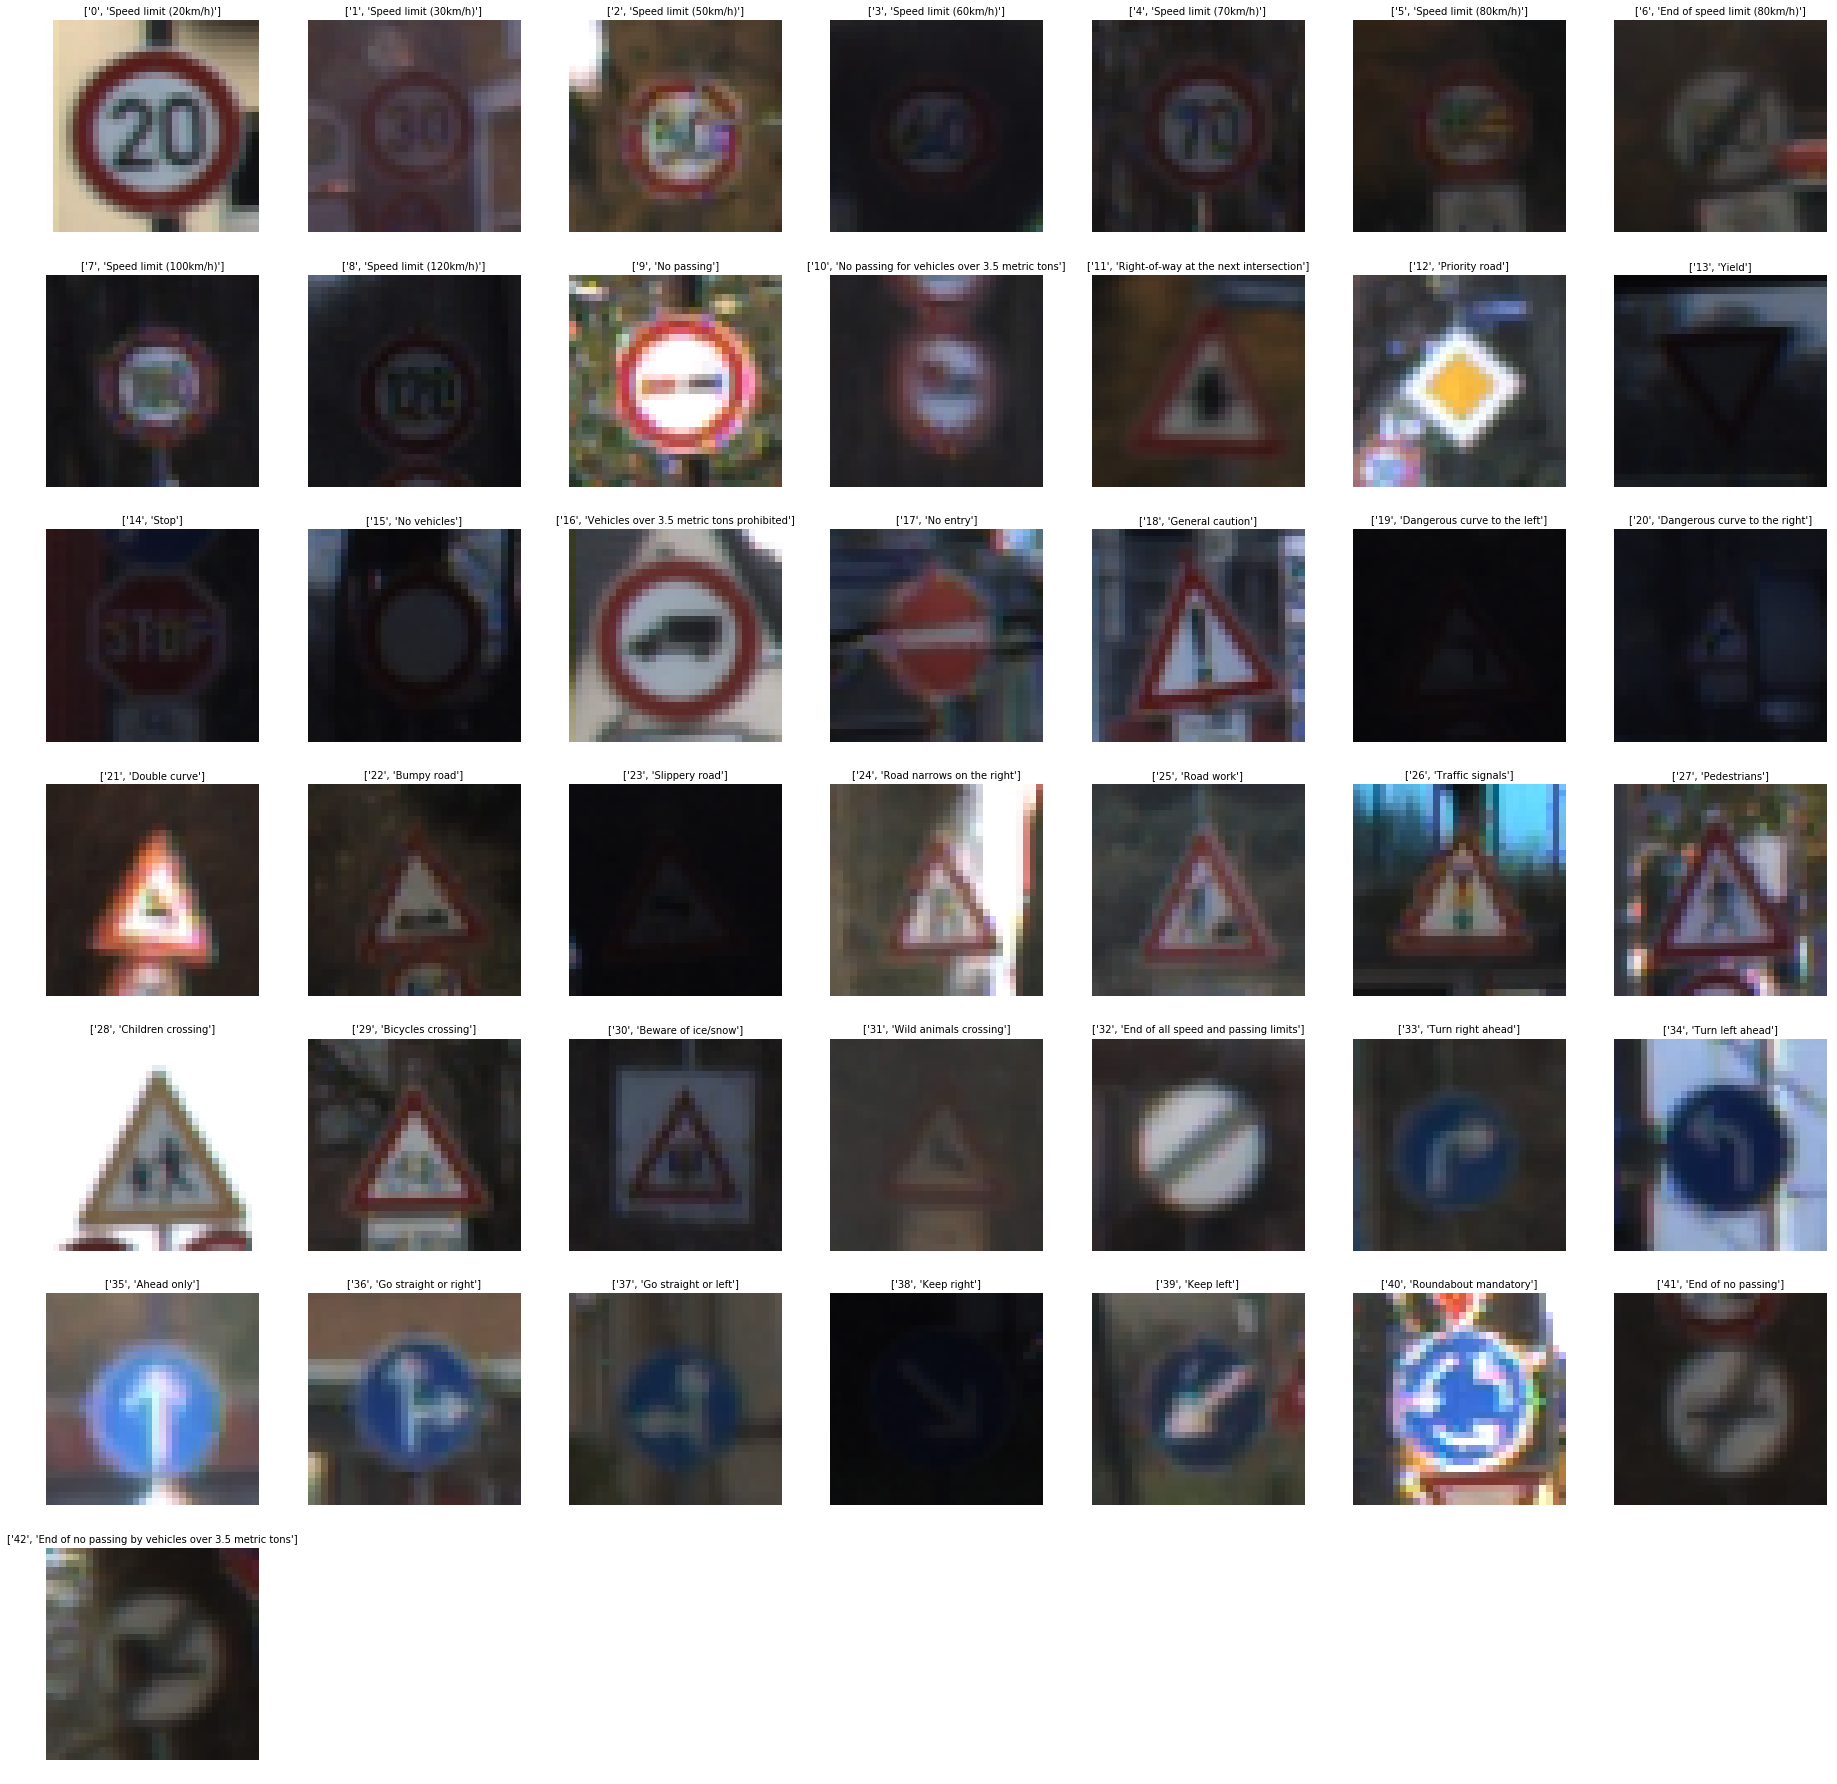

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

fig_traff_sings = plt.figure(figsize=(32, 32))
labels, unique = np.unique(y_train, return_index=True)

with open('signnames.csv', mode='rt') as n:
    reader = csv.reader(n)
    sign_names = list(reader)
    # print(sign_names)

    for i, out in enumerate(unique):
        fig_traff_sings.add_subplot(7, 7, i + 1)
        plt.axis('off')
        plt.title(sign_names[y_train[out] + 1], fontsize=10)
        plt.imshow(X_train[out])

    plt.show()

Forty three images above are from each classes.

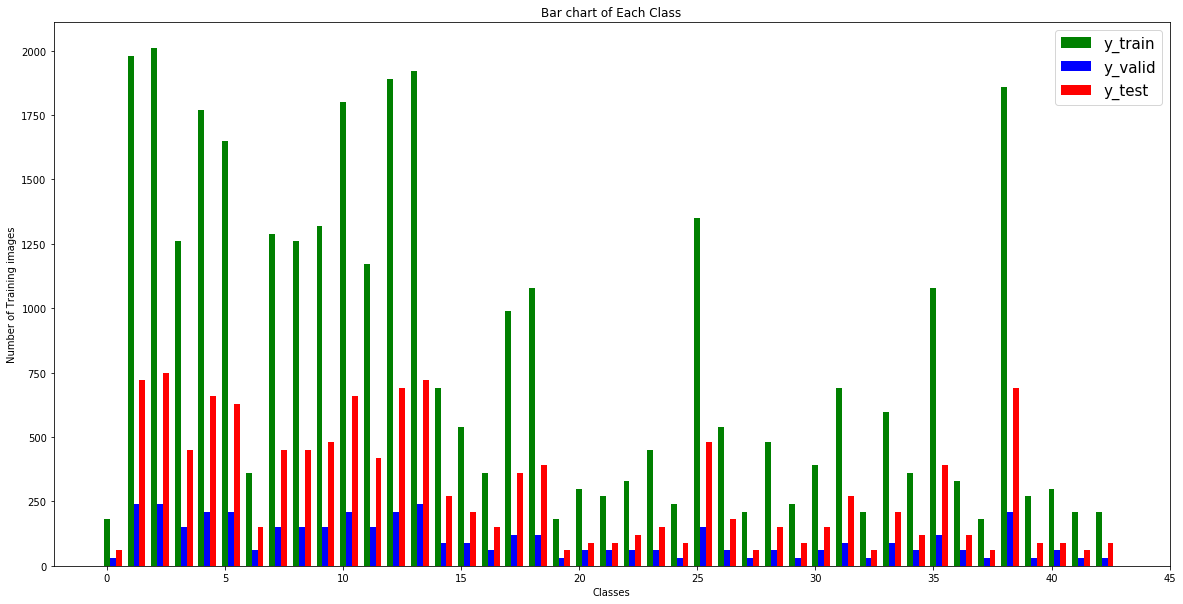

Counts for each class of y_trian:
 [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
Counts for each class of y_valid:
 [ 30 240 240 150 210 210  60 150 150 150 210 150 210 240  90  90  60 120
 120  30  60  60  60  60  30 150  60  30  60  30  60  90  30  90  60 120
  60  30 210  30  60  30  30]
Counts for each class of y_test:
 [ 60 720 750 450 660 630 150 450 450 480 660 420 690 720 270 210 150 360
 390  60  90  90 120 150  90 480 180  60 150  90 150 270  60 210 120 390
 120  60 690  90  90  60  90]


In [5]:
y_1 = np.bincount(y_train)
y_2 = np.bincount(y_valid)
y_3 = np.bincount(y_test)
y_view = [y_1, y_2, y_3]
X = np.arange(n_classes)
width = 0.25
plt.figure(figsize=(20, 10))
plt.bar(X + 0.00,    y_view[0], color='g', width=width, label='y_train')
plt.bar(X + width,   y_view[1], color='b', width=width, label='y_valid')
plt.bar(X + width*2, y_view[2], color='r', width=width, label='y_test')
plt.xticks(np.linspace(0, 45, 10, endpoint=True))

plt.xlabel('Classes')
plt.ylabel('Number of Training images')
plt.title('Bar chart of Each Class')
plt.legend(prop={'size': 15})
plt.show()
print('Counts for each class of y_trian:\n', np.bincount(y_train))
print('Counts for each class of y_valid:\n', np.bincount(y_valid))
print('Counts for each class of y_test:\n', np.bincount(y_test))

'Sign_names.csv' file can be used to see the distribution per sign names. 
As we can see above, the dataset is very biased toward some classes of traffic signs. Thus, the distribution of classes is very skewed.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    # return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    gaus = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    return gaus[:, :, np.newaxis]


def hist_equalization(img):
    """
    Improve the contrast of image
    Helps distribute the range of color in the image
    Read more at
    http://docs.opencv.org/trunk/d5/daf/tutorial_py_histogram_equalization.html
    :param img:
    :return:
    """
    # return cv2.equalizeHist(img)
    hist = cv2.equalizeHist(img)
    return hist[:, :, np.newaxis]


# def normalize(img):
#     norm = (img - img.mean()) / (np.max(img) - np.min(img))
#     return norm


def normalize(img):
    norm = (img - img.mean()) / img.std()
    return norm


def random_translate(img):
    rows, cols, _ = img.shape

    pix = 2
    dx, dy = np.random.randint(-pix, pix, 2)

    M = np.float32([[1, 0, dx], [0, 1, dy]])
    dst = cv2.warpAffine(img, M, (cols, rows))

    return dst[:, :, np.newaxis]


def random_rotation(img):
    rows, cols, _ = img.shape
    random_angle = np.random.randint(-360, 360)
    if random_angle == 0:
        return img

    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), random_angle, 1)
    dst = cv2.warpAffine(img, M, (cols, rows))

    return dst[:, :, np.newaxis]


def getPerspectiveTransform(img):
    rows, cols, _ = img.shape

    # transform limit
    pix = np.random.randint(-2, 2)
    # ending locations
    pts1 = np.float32([[pix, pix], [rows - pix, pix], [pix, cols - pix], [rows - pix, cols - pix]])

    # starting locations (4 corners)
    pts2 = np.float32([[0, 0], [rows, 0], [0, cols], [rows, cols]])

    M = cv2.getPerspectiveTransform(pts1, pts2)

    dst = cv2.warpPerspective(img, M, (rows, cols))

    return dst[:, :, np.newaxis]


# def normalize(img):
#     norm = (img - img.mean()) / (np.max(img) - np.min(img))
#     return norm


def preprocessing(imgs):
    processed_img = []

    for img in imgs:
        gray = grayscale(img)
        hist = hist_equalization(gray)
        norm = normalize(hist)
        trans = random_translate(norm)
        rot = random_rotation(trans)
        pers = getPerspectiveTransform(rot)
        # norm = normalize(pers)
        processed_img.append(norm)
    return processed_img


X_train = preprocessing(X_train)
X_valid = preprocessing(X_valid)
X_test = preprocessing(X_test)
print('Shape of New_X_train: ', X_train[0].shape)
print('Length of New_X_train: ', len(X_train))

Shape of New_X_train:  (32, 32, 1)
Length of New_X_train:  34799


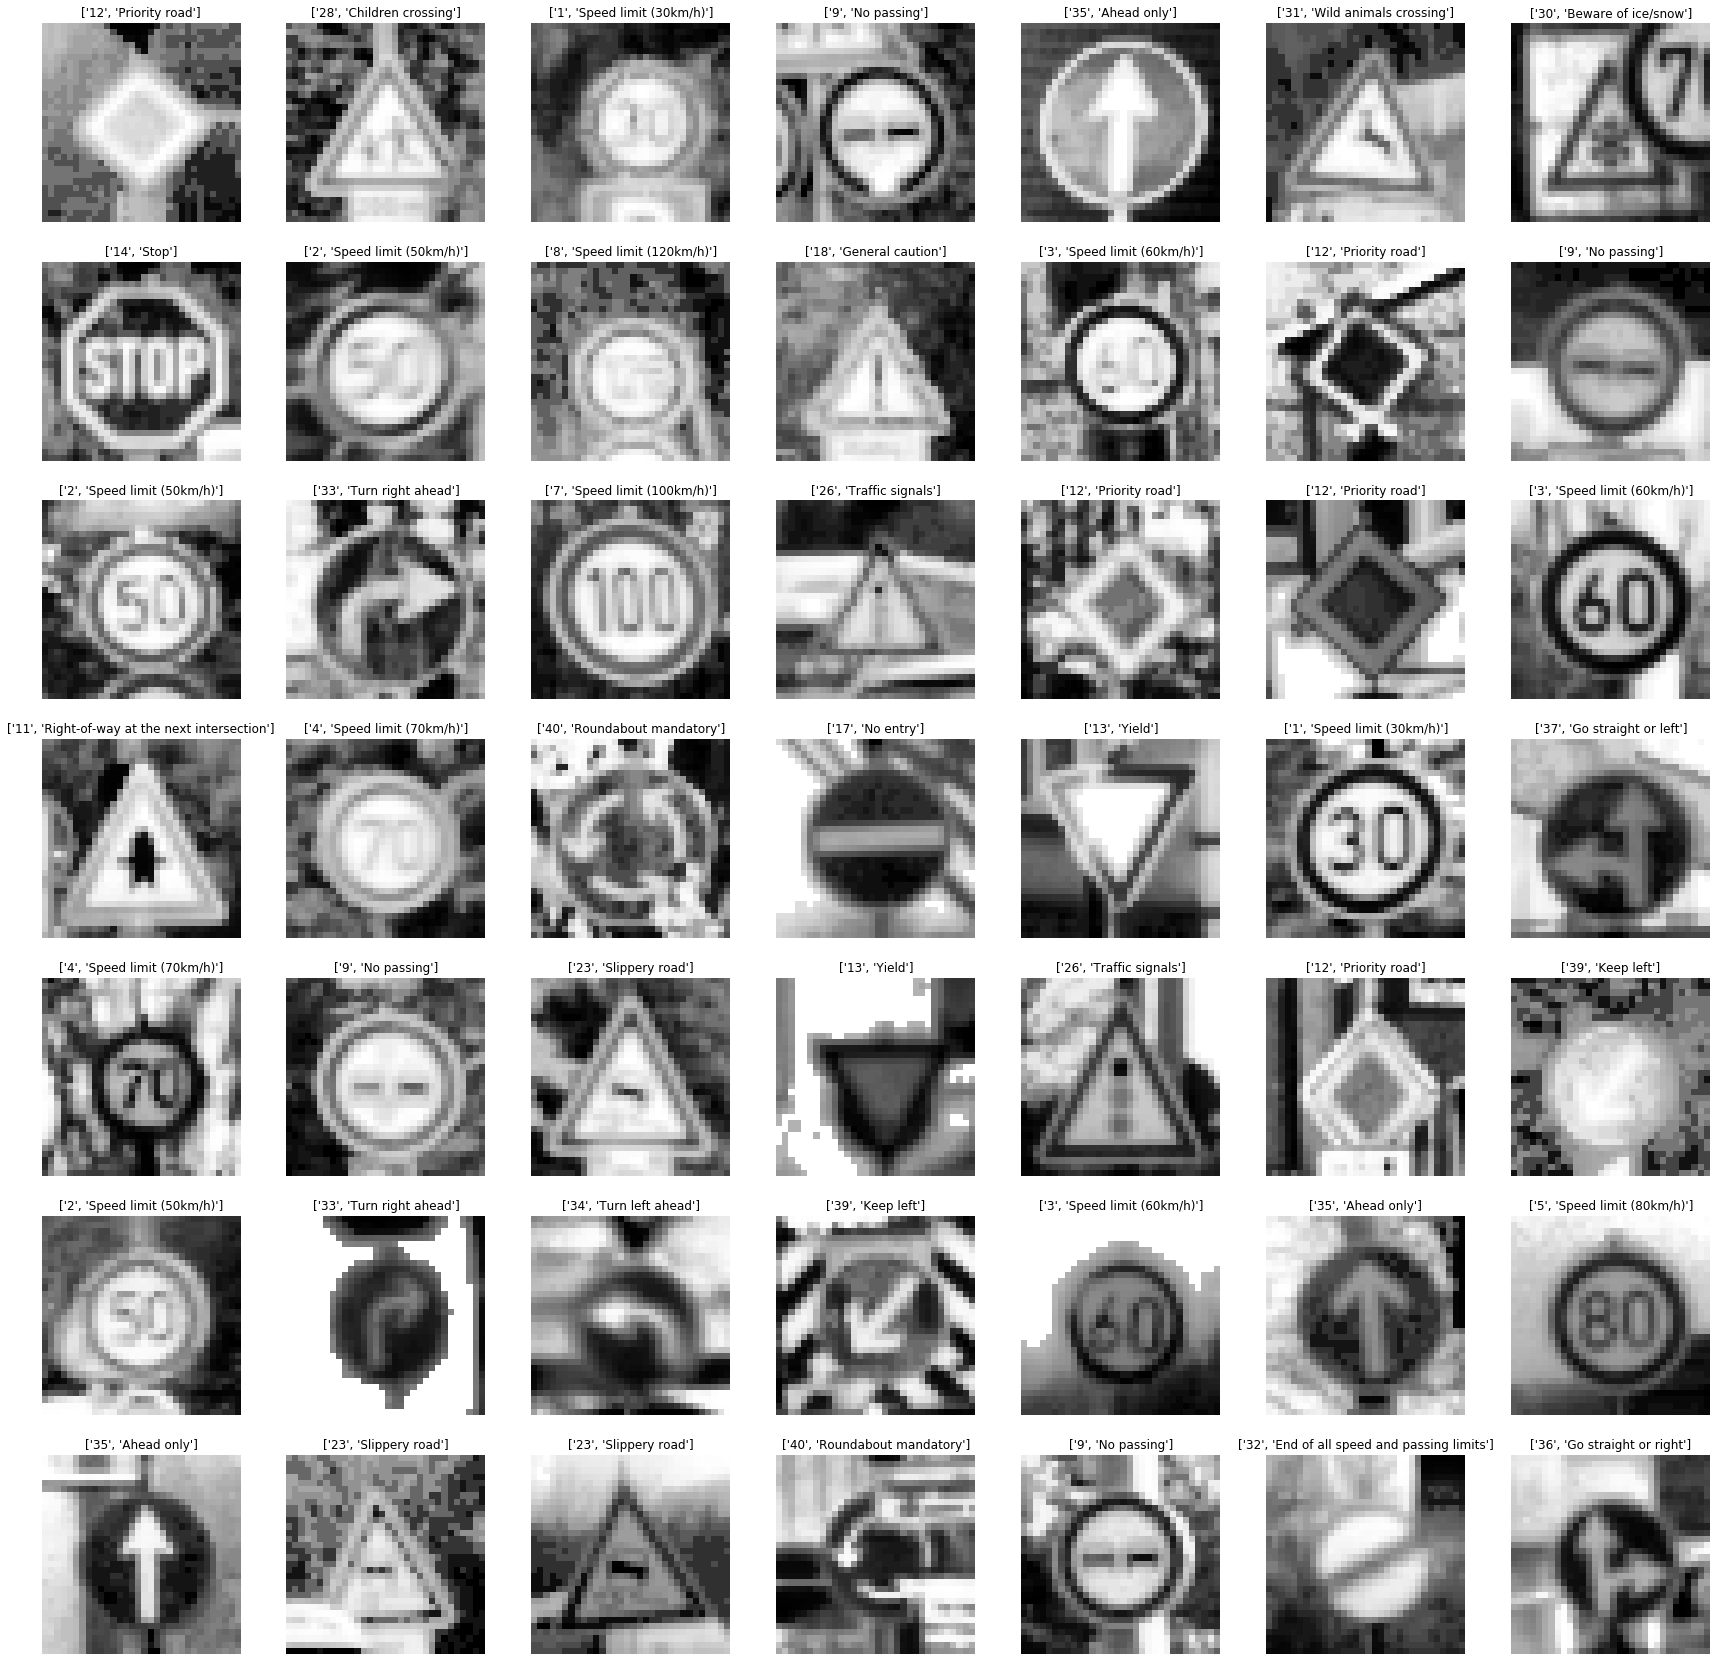

In [7]:
r = 7
c = 7
x = 0
fig_traff_sings = plt.figure(figsize=(30, 30))
with open('signnames.csv', mode='rt') as n:
    reader = csv.reader(n)
    sign_names = list(reader)
    for i in range(r):
        for j in range(c):

            fig_traff_sings.add_subplot(r, c, x + 1)
            index = random.randint(0, len(X_train))
            image = X_train[index + 1].squeeze()
            plt.axis('off')
            plt.title(sign_names[y_train[index] + 1], fontsize=12)
            fig = plt.imshow(image, cmap='gray')
            x += 1
    plt.show()

### Preprocessing

The forty nine random images right above are  from training dataset.

These images's color channels are reduced to one channel from three since training the model with reduced amount of input data is much fater.  

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Model Architecture

#### Original LeNet Model:

The model is based on LeNet by Yann LeCun. It is a convolutional neural network designed to recognize visual patterns directly from pixel images with minimal preprocessing. It can handle hand-written characters very well.
![title](lenet.png)

Source: http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

#### My LeNet Model to Get Better Result:

My LeNet model is slightly changed from the original LeNet model:
- ELU activation is used since this activation speeds up learning in Deep Neural Networks(DNN) and leads to highter classification accuracies than ReLU activation.
- Droupout is used to avoid overfitting in DNN. 
- AdamOptimizer is used since this enables to use a larger effective step size and requires less memory size.

#### Picture of Comparison of Adam to Other Optimization Algorithms:

![title](optimizers.png)

#### Table of Parameters

| Name of Parameters          | Size          | 
| :-------------------------- |:-------------:|
| EPOCHS                      | 50            | 
| BATCH_SIZE                  | 128           | 
| learning_rate               | 0.001         |

#### Table of Modified LeNet Model:

| Layer                       | Input Shape   | Output Shape   
| :-------------------------- |:-------------:| :------------: 
| Input                       | 32x32x1       | 32x32x1       
| Convolution(Valid, 5x5x32)  | 32x32x1       | 28x28x32       
| ELU Activation              | 28x28x32      | 28x28x32      
| Max Pooling(Valid, 2x2)     | 28x28x32      | 14x14x32      
| Convolution(Valid, 5x5x64)  | 14x14x32      | 10x10x64      
| ELU Activation              | 10x10x64      | 10x10x64      
| Max Pooling(Valid, 2x2)     | 10x10x64      | 5x5x64        
| Convolution(Valid, 2x2x128) | 5x5x64        | 4x4x128       
| ELU Activation              | 4x4x128       | 4x4x128       
| Max Pooling(Valid, 2x2)     | 4x4x128       | 2x2x128       
| Dropout (0.5)               | 4x4x128       | 4x4x128       
| Flatten                     | 2x2x128 = 512 | 512           
| Fully Connected             | 512           | 256           
| ELU Activation              | 256           | 256           
| Dropout (0.5)               | 256           | 256           
| Fully Connected             | 256           | 128           
| ELU Activation              | 128           | 128           
| Dropout (0.5)               | 128           | 128          
| Fully Connected             | 128           | 43            

Source: https://arxiv.org/pdf/1511.07289.pdf

Source: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing

def myLeNet(x):
    mu = 0
    sigma = 0.1

    # Layer 1: Input = 32x32x1. Output = 28x28x32.
    W1 = tf.Variable(tf.truncated_normal((5, 5, 1, 32), mean=mu, stddev=sigma))
    b1 = tf.Variable(tf.zeros(32))
    conv1 = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID') + b1
    # Activation.
    # L1 = tf.nn.relu(conv1)
    L1 = tf.nn.elu(conv1)
    # Pooling. Input = 28x28x32. Output = 14x14x32.
    L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    # L1 = tf.nn.dropout(MaxPool_1, keep_prob=keep_prob)

    # Layer 2: Convolutional. Input = 14x14x32. Output = 10x10x64.
    W2 = tf.Variable(tf.truncated_normal((5, 5, 32, 64), mean=mu, stddev=sigma))
    b2 = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='VALID') + b2
    # Activation.
    # L2 = tf.nn.relu(conv2)
    L2 = tf.nn.elu(conv2)
    # Pooling. Input = 10x10x64. Output = 5x5x64.
    L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    # L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

    # Layer 3: Convolutional. Input = 5x5x64. Output = 4x4x128.
    W3 = tf.Variable(tf.truncated_normal((2, 2, 64, 128), mean=mu, stddev=sigma))
    b3 = tf.Variable(tf.zeros(128))
    conv3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='VALID') + b3
    # Activation.
    # L3 = tf.nn.relu(conv3)
    L3 = tf.nn.elu(conv3)
    # Pooling. Input = 4x4x128. Output = 2x2x128.
    L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

    # Flatten. Input = 2x2x128. Output = 512.
    input_flatten = flatten(L3)

    # Layer 4: Fully Connected. Input = 2x2x128. Output = 256.
    # fc_W4 = tf.Variable(tf.truncated_normal((2 * 2 * 32, 256), mean=mu, stddev=sigma))
    fc_W4 = tf.get_variable("fc_W4", shape=[2 * 2 * 128, 256],
                            initializer=tf.contrib.layers.xavier_initializer())
    fc_b4 = tf.Variable(tf.zeros(256))
    fc4 = tf.matmul(input_flatten, fc_W4) + fc_b4
    # Activation.
#     _L4 = tf.nn.relu(fc4)
    _L4 = tf.nn.elu(fc4)
    L4 = tf.nn.dropout(_L4, keep_prob=keep_prob)

    # Layer 5: Fully Connected. Input = 256. Output = 128.
    # fc_W5 = tf.Variable(tf.truncated_normal((256, 128), mean=mu, stddev=sigma))
    fc_W5 = tf.get_variable("fc_W5", shape=[256, 128],
                            initializer=tf.contrib.layers.xavier_initializer())
    fc_b5 = tf.Variable(tf.zeros(128))
    fc5 = tf.matmul(L4, fc_W5) + fc_b5
    # Activation.
#     _L5 = tf.nn.relu(fc5)
    _L5 = tf.nn.elu(fc5)
    L5 = tf.nn.dropout(_L5, keep_prob=keep_prob)

    # Layer 6: Fully Connected. Input = 128. Output = 43.
    # fc_W6 = tf.Variable(tf.truncated_normal((128, n_classes), mean=mu, stddev=sigma))
    fc_W6 = tf.get_variable("fc_W6", shape=[128, n_classes],  # 128 = > % 98, 256 => % 98.3
                            initializer=tf.contrib.layers.xavier_initializer())
    fc_b6 = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(L5, fc_W6) + fc_b6


    return logits

In [10]:
# parameters
keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
learning_rate = 0.001
EPOCHS = 50
BATCH_SIZE = 128
logits = myLeNet(x)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    labels=one_hot_y, logits=logits))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))

    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print('\nTraining...\n')
  
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        avg_cost = 0

        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            c, _ = sess.run([loss, optimizer], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            avg_cost += c / BATCH_SIZE

        validation_accuracy = evaluate(X_valid, y_valid)
        # if i % 5 == 0:
        print("EPOCH {} : ".format(i + 1), '\nloss =', '{:.9f}'.format(avg_cost))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, 'myNet/model.ckpt')
    print("Model saved")

# with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
#
#     test_accuracy = evaluate(X_test, y_test)
#     print("Test Accuracy = {:.3f}".format(test_accuracy))


Training...

EPOCH 1 :  
loss = 4.286531591
Validation Accuracy = 0.812

EPOCH 2 :  
loss = 1.450755585
Validation Accuracy = 0.905

EPOCH 3 :  
loss = 0.868104021
Validation Accuracy = 0.933

EPOCH 4 :  
loss = 0.611780026
Validation Accuracy = 0.941

EPOCH 5 :  
loss = 0.485098998
Validation Accuracy = 0.944

EPOCH 6 :  
loss = 0.412189561
Validation Accuracy = 0.960

EPOCH 7 :  
loss = 0.339693044
Validation Accuracy = 0.959

EPOCH 8 :  
loss = 0.303301577
Validation Accuracy = 0.970

EPOCH 9 :  
loss = 0.264885547
Validation Accuracy = 0.968

EPOCH 10 :  
loss = 0.248061808
Validation Accuracy = 0.963

EPOCH 11 :  
loss = 0.237661821
Validation Accuracy = 0.974

EPOCH 12 :  
loss = 0.217954849
Validation Accuracy = 0.975

EPOCH 13 :  
loss = 0.199574319
Validation Accuracy = 0.976

EPOCH 14 :  
loss = 0.199535378
Validation Accuracy = 0.976

EPOCH 15 :  
loss = 0.194021960
Validation Accuracy = 0.969

EPOCH 16 :  
loss = 0.176926357
Validation Accuracy = 0.976

EPOCH 17 :  
loss =

## Observation of My LeNet Model:
- As we can see the result above, the hightest accuracy is 98.7%.
- This model ends up with 98.4% accuracy which is a lot greater than 93%.
- Since my LeNet model gives much higher accuracy, this modified LeNet model is pretty good.

In [11]:
# Eval test set
with tf.Session() as sess:
    # saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, 'myNet/model.ckpt')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from myNet/model.ckpt
Test Accuracy = 0.966


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
test_imgs = []
dir_img = 'test_imgs/'

for img in os.listdir(dir_img):

    test_img = cv2.imread(dir_img + img)
    test_img = cv2.resize(test_img, (32, 32))
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    # Because OpenCV stores images in BGR order instead of RGB.
    test_imgs.append(test_img)

test_imgs = np.array(test_imgs)
print('Shape of test_imgs: ', test_imgs[0].shape)

Shape of test_imgs:  (32, 32, 3)


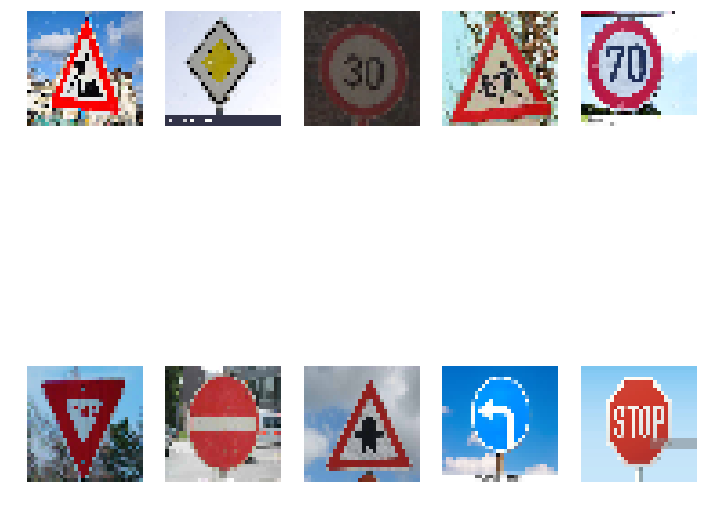

In [13]:
# test image outputs

test_figure = plt.figure(figsize=(12, 12))
for i, img in enumerate(test_imgs):
    test_figure.add_subplot(2, 5, i + 1)
#     plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

In [14]:
test_imgs = preprocessing(test_imgs) 
print('Shape of Test Images: ', test_imgs[0].shape)
print('Length of Test Images: ', len(test_imgs))

Shape of Test Images:  (32, 32, 1)
Length of Test Images:  10


In [15]:
### Run the predictions here and use the model to output the prediction for each image.
test_labels = [25, 12, 1, 28, 4, 13, 17, 11, 34, 14]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver1 = tf.train.import_meta_graph('myNet/model.ckpt.meta')
    saver1.restore(sess, 'myNet/model.ckpt')
    my_accuracy = evaluate(test_imgs, test_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from myNet/model.ckpt
Test Set Accuracy = 0.900


In [16]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)

def top_five(X_data, sess):
    prob = sess.run(softmax_logits, feed_dict={x: X_data, keep_prob: 1})
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)

with tf.Session() as sess:
    saver.restore(sess, 'myNet/model.ckpt')
    traffic_sign_top_5 = top_five(test_imgs, sess)
    

INFO:tensorflow:Restoring parameters from myNet/model.ckpt


INFO:tensorflow:Restoring parameters from myNet/model.ckpt

Input Image 1


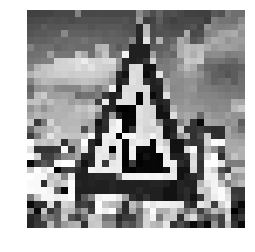

['25', 'Road work'], Probability: 63.99%
['29', 'Bicycles crossing'], Probability: 15.26%
['31', 'Wild animals crossing'], Probability: 10.44%
['22', 'Bumpy road'], Probability: 9.92%
['24', 'Road narrows on the right'], Probability: 0.21%

Input Image 2


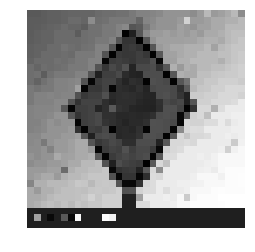

['12', 'Priority road'], Probability: 100.00%
['32', 'End of all speed and passing limits'], Probability: 0.00%
['40', 'Roundabout mandatory'], Probability: 0.00%
['38', 'Keep right'], Probability: 0.00%
['41', 'End of no passing'], Probability: 0.00%

Input Image 3


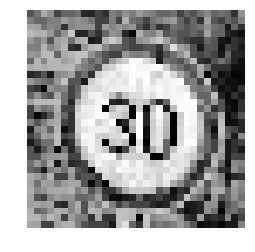

['1', 'Speed limit (30km/h)'], Probability: 97.44%
['5', 'Speed limit (80km/h)'], Probability: 2.52%
['40', 'Roundabout mandatory'], Probability: 0.01%
['4', 'Speed limit (70km/h)'], Probability: 0.01%
['38', 'Keep right'], Probability: 0.01%

Input Image 4


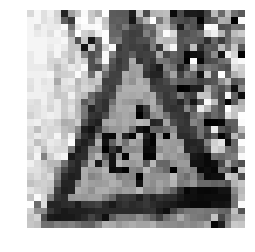

['28', 'Children crossing'], Probability: 96.07%
['29', 'Bicycles crossing'], Probability: 3.88%
['30', 'Beware of ice/snow'], Probability: 0.03%
['22', 'Bumpy road'], Probability: 0.01%
['24', 'Road narrows on the right'], Probability: 0.00%

Input Image 5


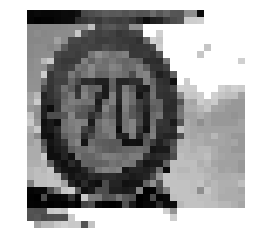

['1', 'Speed limit (30km/h)'], Probability: 91.48%
['5', 'Speed limit (80km/h)'], Probability: 3.67%
['2', 'Speed limit (50km/h)'], Probability: 3.29%
['40', 'Roundabout mandatory'], Probability: 1.38%
['31', 'Wild animals crossing'], Probability: 0.05%

Input Image 6


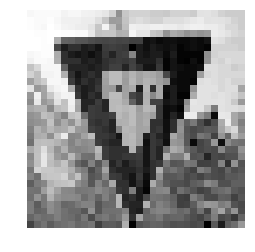

['13', 'Yield'], Probability: 100.00%
['14', 'Stop'], Probability: 0.00%
['6', 'End of speed limit (80km/h)'], Probability: 0.00%
['36', 'Go straight or right'], Probability: 0.00%
['33', 'Turn right ahead'], Probability: 0.00%

Input Image 7


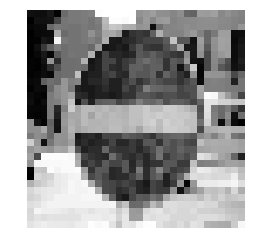

['17', 'No entry'], Probability: 100.00%
['0', 'Speed limit (20km/h)'], Probability: 0.00%
['1', 'Speed limit (30km/h)'], Probability: 0.00%
['2', 'Speed limit (50km/h)'], Probability: 0.00%
['3', 'Speed limit (60km/h)'], Probability: 0.00%

Input Image 8


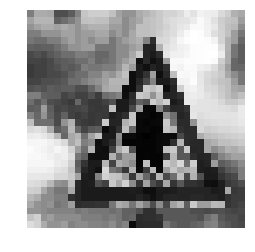

['11', 'Right-of-way at the next intersection'], Probability: 95.27%
['30', 'Beware of ice/snow'], Probability: 4.38%
['27', 'Pedestrians'], Probability: 0.21%
['21', 'Double curve'], Probability: 0.08%
['40', 'Roundabout mandatory'], Probability: 0.02%

Input Image 9


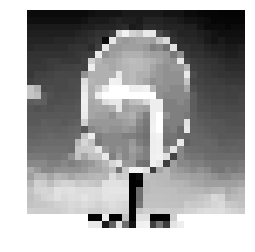

['34', 'Turn left ahead'], Probability: 99.71%
['5', 'Speed limit (80km/h)'], Probability: 0.13%
['38', 'Keep right'], Probability: 0.07%
['3', 'Speed limit (60km/h)'], Probability: 0.02%
['36', 'Go straight or right'], Probability: 0.01%

Input Image 10


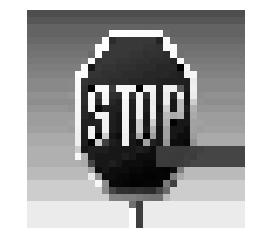

['14', 'Stop'], Probability: 99.18%
['5', 'Speed limit (80km/h)'], Probability: 0.79%
['8', 'Speed limit (120km/h)'], Probability: 0.02%
['4', 'Speed limit (70km/h)'], Probability: 0.01%
['7', 'Speed limit (100km/h)'], Probability: 0.00%


In [17]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('myNet/model.ckpt.meta')
    saver.restore(sess, 'myNet/model.ckpt')
    top_k_values, top_k_indices = sess.run(top_k, feed_dict={x: test_imgs, keep_prob: 1.0})

    for i in range(len(test_imgs)):
        print("\nInput Image", i + 1)
        plt.axis('off')
        plt.imshow(test_imgs[i].squeeze(), cmap='gray')
        plt.show()
        for j in range(5): 
            print('{}, Probability: {:.2f}%'
                  .format(sign_names[top_k_indices[i][j] + 1], 100*top_k_values[i][j]))



### Observation of New Test Images:

We can see that 9 out of 10 are correct. 
- 5th test sign is 'Speed limit (70km/h)' but the top guess is 'Speed limit (30km/h)' sign with probability of 91.48%. Second top guess is 'Speed limit (80km/h)' with probability of 3.67%. 


I think some misclassification might be due to the image distortion by the resizeing operation.


### Table of My Test Images and Prediction:
| Image                       | Prediction              | True/False 
| :-------------------------- |------------------------:| :------------: 
| Road Work                   | Beware of ice/snow      | True 
| Priority road               | Priority road           | True 
| Speed limit (30km/h)        | Speed limit (30km/h)    | True 
| Children crossing           | Children crossing       | True 
| Speed limit (70km/h)        | Speed limit (30km/h)    | False
| Yield                       | Yield                   | True 
| No entry                    | No entry                | True 
| Right-of-way at the next intersection| Right-of-way at the next intersection      | True 
| Turn left ahead             | Turn left ahead         | True
| Stop                        | Speed limit (50km/h)    | True


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## References:

- German Traffic Sign Benchmarks: http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset

- LeNet Demo (Yann LeCun): http://yann.lecun.com/exdb/lenet/

- Udacity: Self-Driving Car Engineer: Traffic Sign Classifier Project: https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project